# Recursion

#### Review 1

- Why does Python have the complexity of separate references and objects?
- Why not follow the original organization we saw for everything (i.e., boxes of data with labels)?
    - Reason 1: Performance
    - Reason 2: Centralized Updates

In [1]:
# Reason 1: Performance
# Try this example in PythonTutor

x = "this string is millions of characters" + "!" * (10 ** 6)
y = x # this is fast! Why? 
      # Answer: Recall that assignment just creates a reference copy

In [2]:
# Reason 2: Centralized Updates

# Try this example in PythonTutor
alice = {"name":"Alice", "score":10, "age":30}
bob = {"name":"Bob", "score":8, "age":25}
winner = alice

alice["age"] += 1
print("Winner age:", winner["age"]) 
# what line 9 will output?
# Answer: 31

Winner age: 31


#### Review 2

Assignment creates reference copy immaterial of whether it is into a variable or into another data structure. Recall that references can be stored either in a variable or inside object instances for other data structures.

In [3]:
# Try this example in PythonTutor

alice = {"name":"Alice", "score":10, "age":30}
bob = {"name":"Bob", "score":8, "age":25}
team = [alice, bob]              
# TODO: discuss does this create new inner dictionaries?
# Answer: this line only create a new object for outer 
# list, which directly stores references to existing
# dictionary object instances

players = {"A": alice, "B": bob} 
# TODO: discuss does this create new inner dictionaries?
# Answer: this line only create a new object for outer 
# dictionary, which directly stores references to 
# existing dictionary object instances

#### Review 3

In [4]:
# Use 'in' to determine if the given thing is in my_list
my_list = ["meet", "me", "after", "2:00pm"]
print("me" in my_list)       # TODO: predict the output
print("Meena" in my_list)    # TODO: predict the output

True
False


In [5]:
# Let's try a nested list
my_list = [11, "meet", ["me", "them", "us"],  [84, 19, 22], "school", 2.54]
print("me" in my_list)       # TODO: predict the output
print(84 in my_list)         # TODO: predict the output
print(11 in my_list)         # TODO: predict the output

False
False
True


#### Warmup 1

In [6]:
def search_list_depth2(target, some_list):
    ''' returns True if thing in some_list, False otherwise'''
    for thing in some_list: # only range iterates indices
        #print(thing, type(thing))
        if type(thing) != list:
            if target == thing:
                return True
            else:
                continue # do we need this?
        else: # its a list
            if target in thing:
                return True
            else:
                continue # do we need this?
                
    return False  # after all possible searching....not found

print(my_list)
print(search_list_depth2("school", my_list))  # in list
print(search_list_depth2(22, my_list))        # in nested list
print(search_list_depth2("house", my_list))   # not anywhere

[11, 'meet', ['me', 'them', 'us'], [84, 19, 22], 'school', 2.54]
True
True
False


#### Warmup 2

In [7]:
list_3_deep = [22, [33, 44, [55, 66], 77], 88]

# let's try it our previous function
print(search_list_depth2(22, list_3_deep))  # in list
print(search_list_depth2(99, list_3_deep))  # not in list

# write other tests to be sure that it works
print(search_list_depth2(33, list_3_deep))  # in nested list
print(search_list_depth2(55, list_3_deep))  # in nested nested list

True
False
True
False


In [8]:
# what about ANY depth list? 
# that is the goal of today's lecture

## Learning Objectives

After today's Lecture you will be able to: 

Define recursion and be able to identify
- base case
- recursive case
- infinite recursion

Explain why the following can be recursively defined
- lists
- dictionaries

Trace a recursive function
- involving numeric computation
- involving nested data structures

<div>
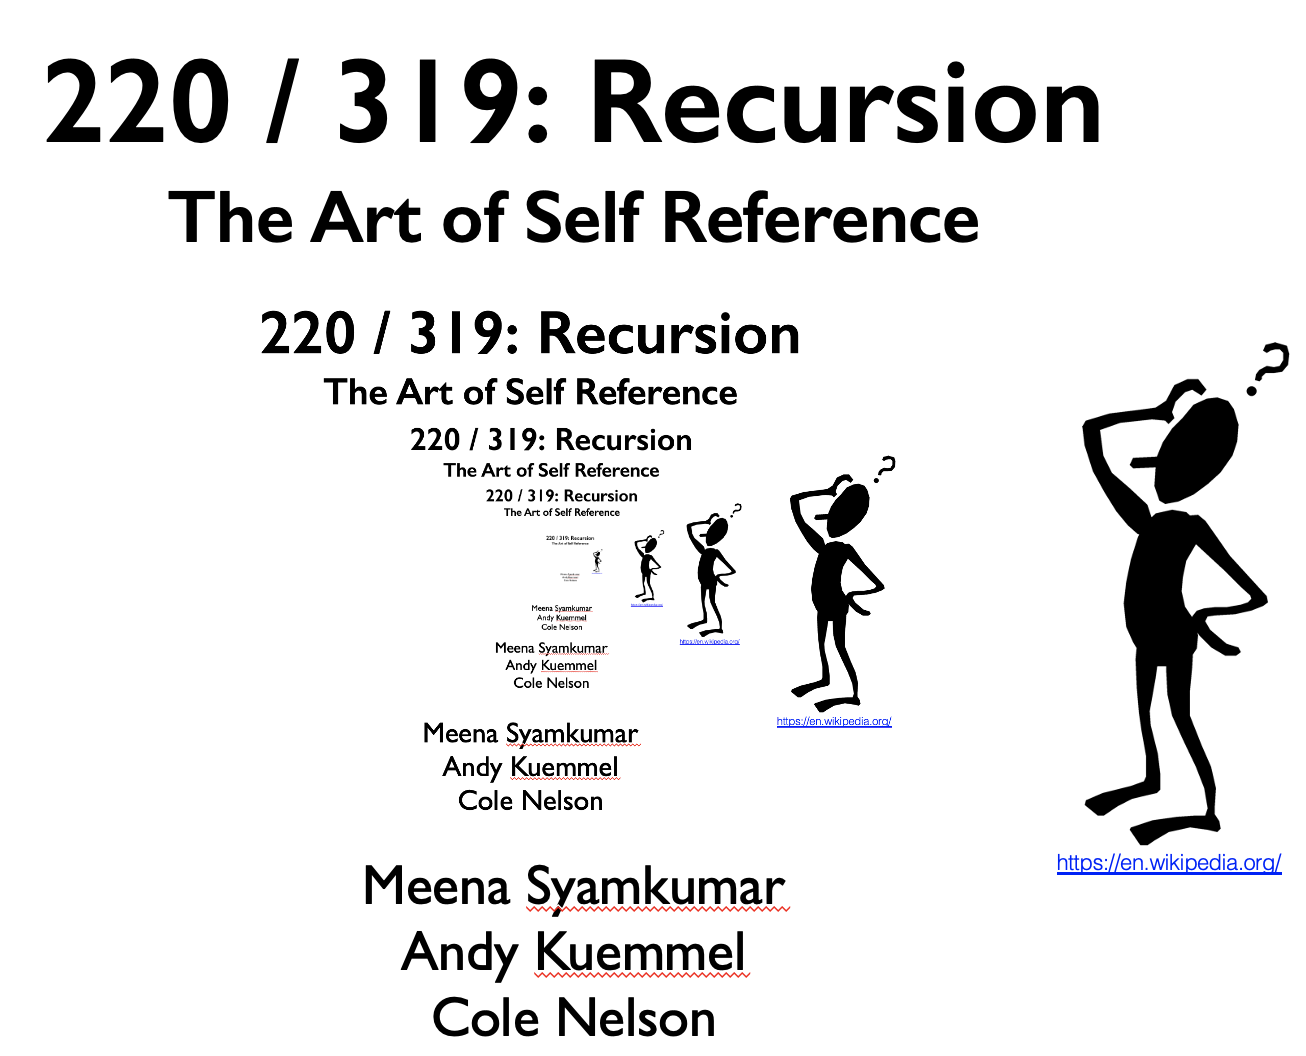
</div>

#### Recursion is defined as the process of defining something in terms of itself.

**Good example:**

*Hofstadter's Law*: “It always takes longer than you expect, even when you take into account *Hofstadter's Law*.” (From Gödel, Escher, Bach)

**Unhelpful self-reference example:**

*mountain*: “a landmass that projects conspicuously above its surroundings and is higher than a *hill*”

*hill*: “a usually rounded natural elevation of land lower than a *mountain*”
(From Merriam-Webster dictionary)

**Mathematical example:**

A number x is a *positive even number* if:
- x is 2 or
- x equals another *positive even number* plus two

<div>
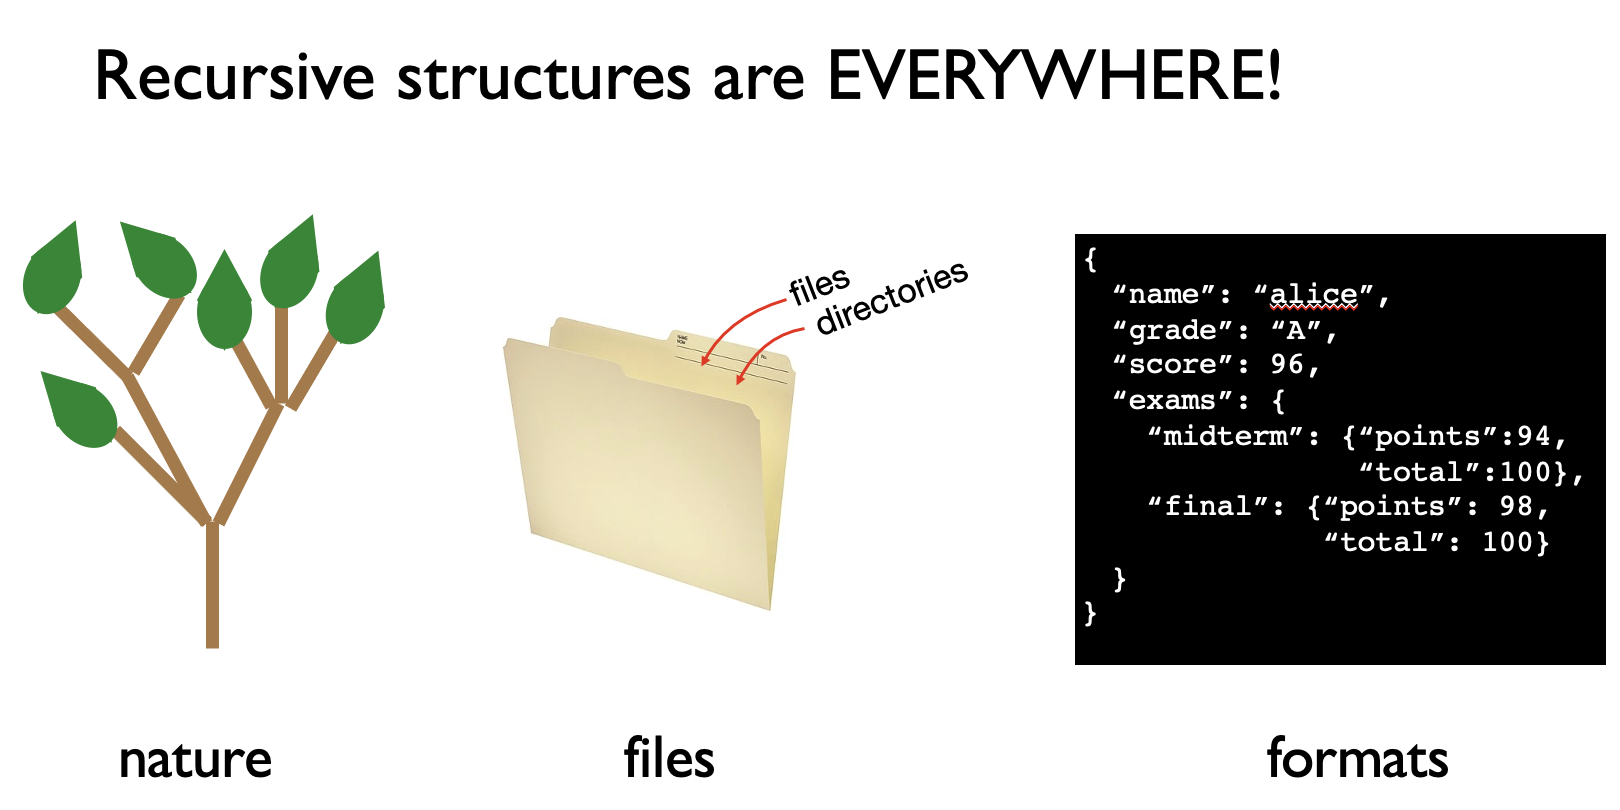
</div>

**Term**: branch

**Definition**: wooden stick, with an end splitting into other *branches*, OR terminating with a leaf


<div>
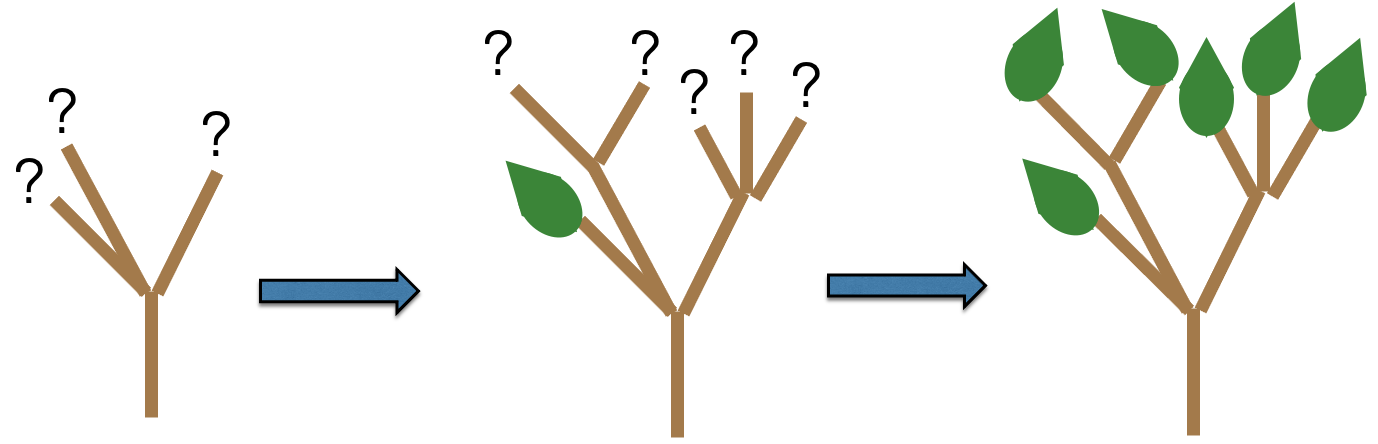
</div>

<div>
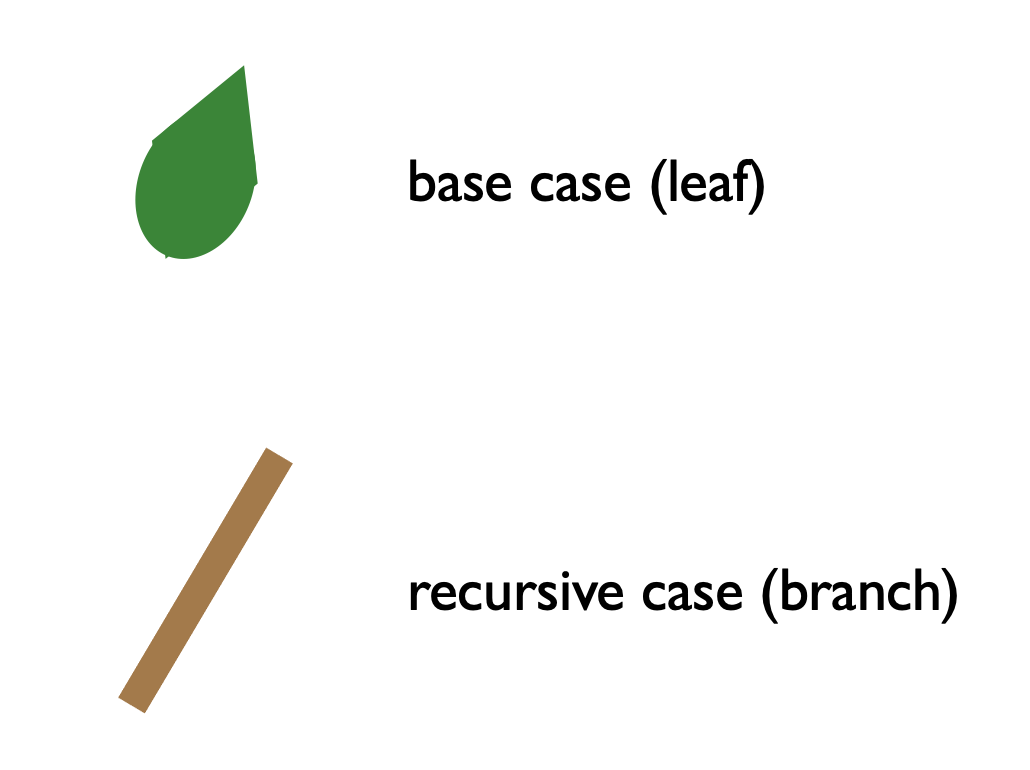
</div>

**Term**: directory

**Definition**: a collection of files and *directories*
    
<div>
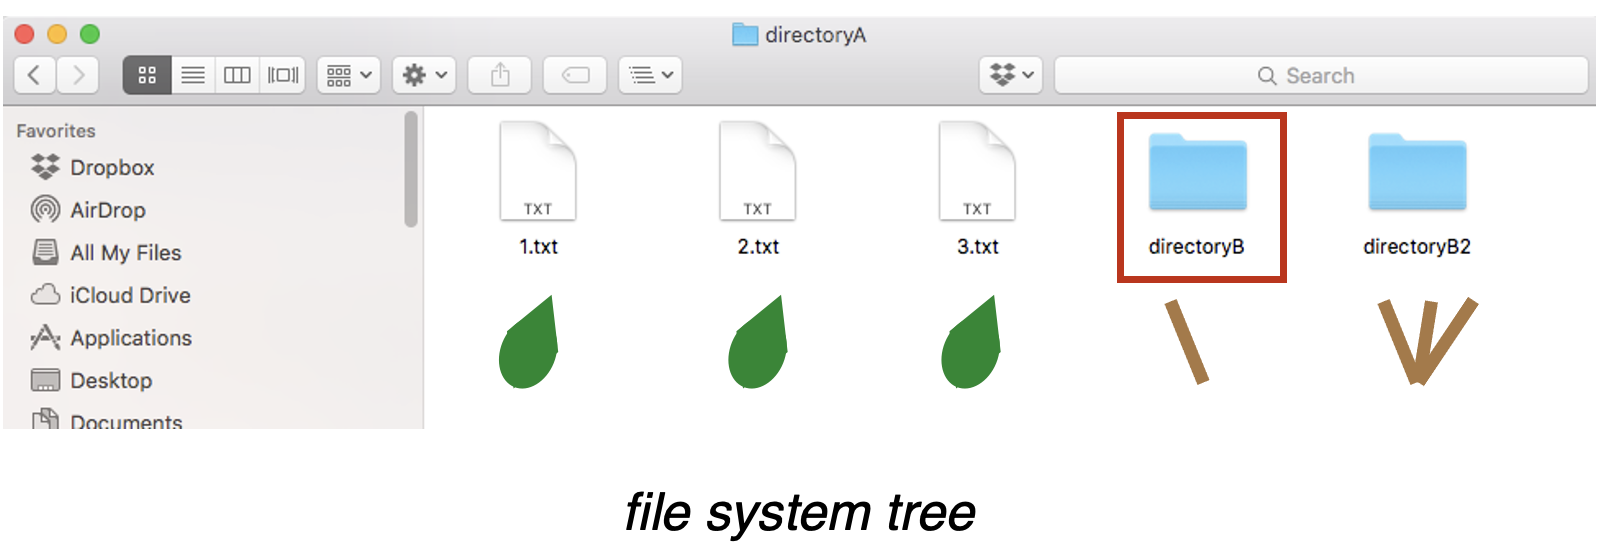
</div>    

### Define recursion and be able to identify 
- base case
- recursive case
- infinite recursion

### Factorial of a number

### Goal: work from examples to get to recursive code

#### Step 1: Come up with examples

```python
1! = 1
2! = 1*2 = 2
3! = 1*2*3 = 6
4! = 1*2*3*4 = 24
5! = 1*2*3*4*5 = 120
```

#### Step 2: Identify self-reference
```python
1! = 1 # don't need a pattern at the start
2! = 1! * 2
3! = 2! * 3
4! = 3! * 4
5! = 4! * 5
```

#### Step 3: Recursive definition
```python
1! is 1
N! is (N-1)! * N for N > 1
```

#### Step 4: Convert to Python code
- **Rule 1**: Base case should always be defined and be terminal
- **Rule 2**: Recursive case should make progress towards base case

In [1]:
def fact(n):
    if n == 1:
        return 1
    if n <= 0:
        return None
    p = fact(n-1)                                   
    return n * p
fact(-1)

### How does Python keep all the variables separate?
- Frames

<div>
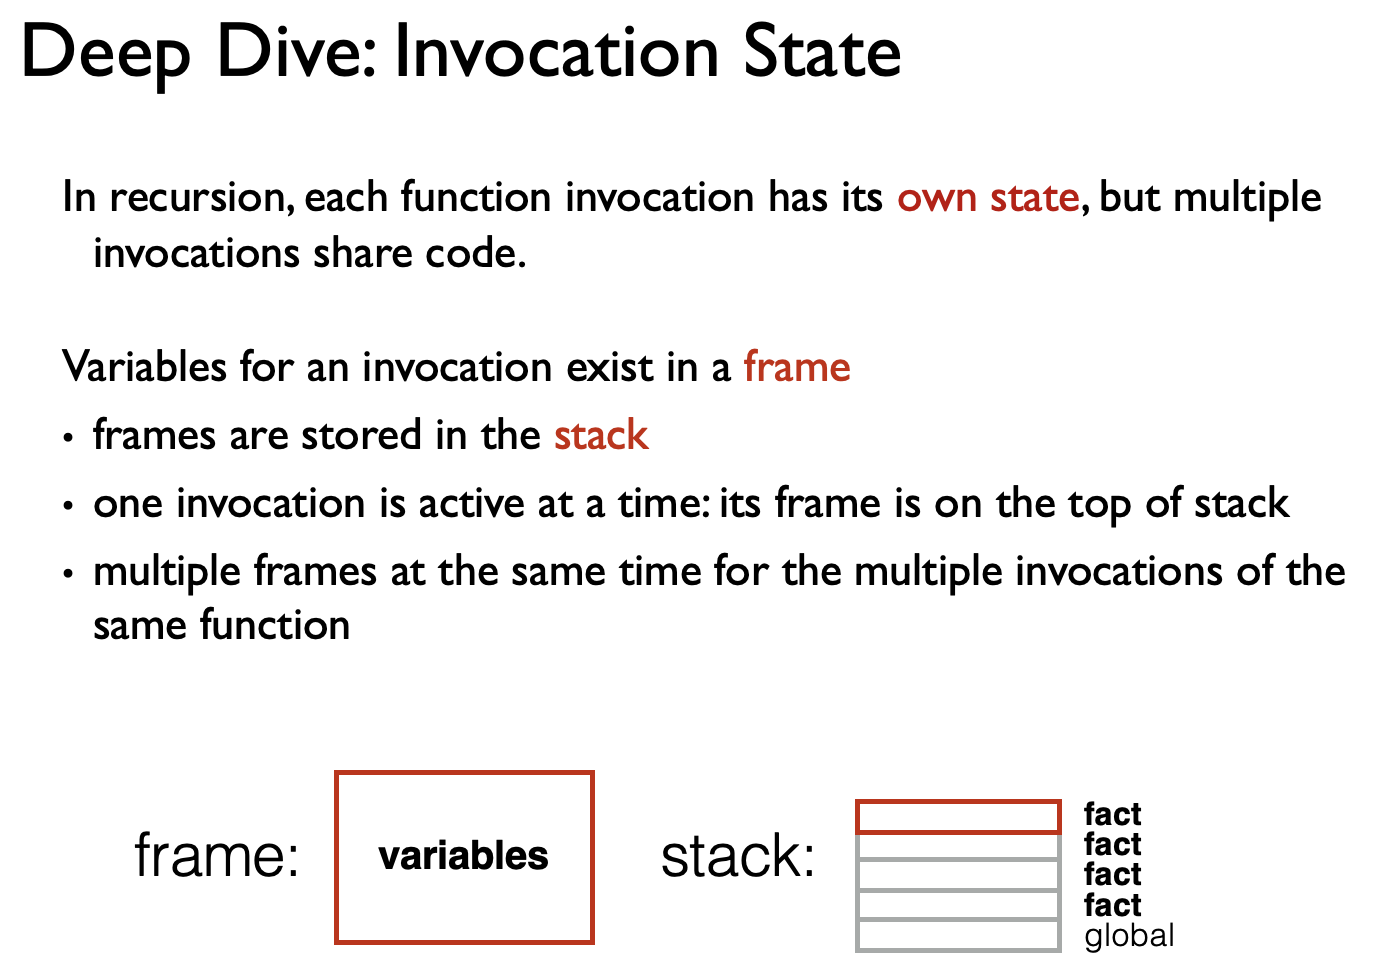
</div> 

In [10]:
# Try this in PythonTutor
fact(3)

6

<div>
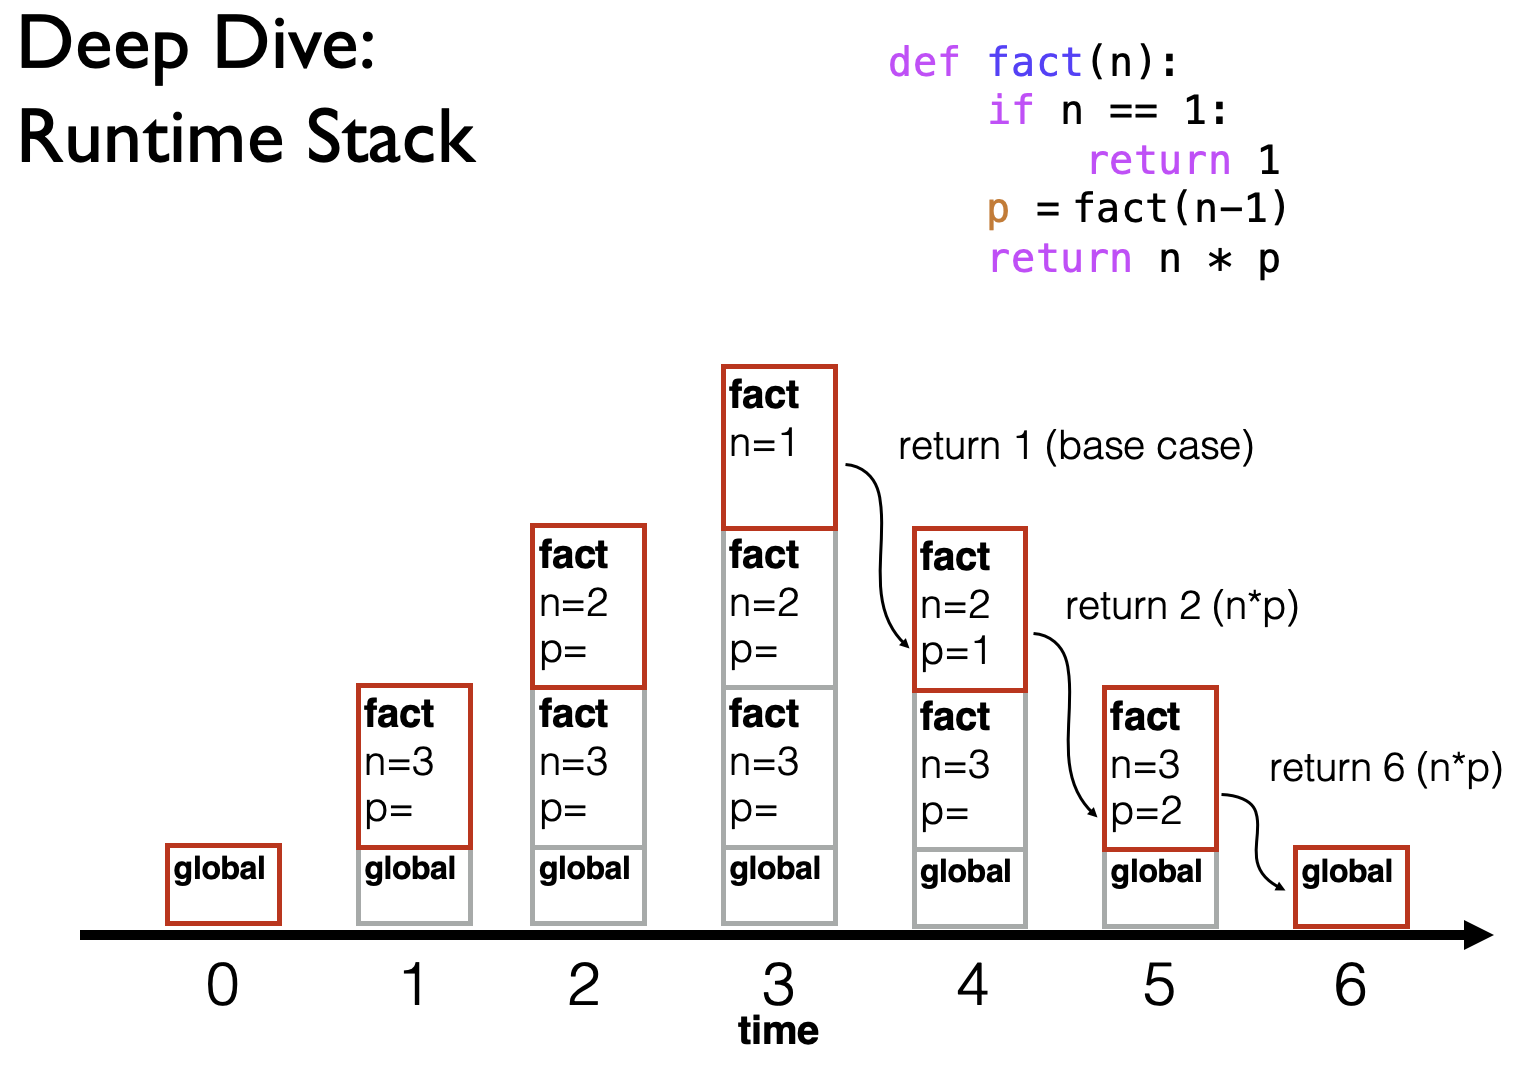
</div> 

### RecursionError

#### If there is no base case what happens in the above example? 
- recursion never ends......infinite recursion

#### infinite recursion can also happen if the recursive case does not move towards the base

In [11]:
def fact(n):
    #if n == 1:
    #    return 1
    p = fact(n-1)                                   
    return n * p
fact(3)

RecursionError: maximum recursion depth exceeded

### Self-check: Tracing example

In [12]:
# Tracing a recursive function in the Python Tutor
# do this on your own
# Example 1

def foo(n):
    # I always start recursive functions by printing the parameters
    print("Starting foo with n= " , n)
    if n < 0:
        print("base case, returning 100")
        return 100
    else:
        temp = foo(n-2)
        print("Ending foo returning " ,  (n + temp))
        return n + temp

foo(13)

# What happens if we replace < with == ? 

Starting foo with n=  13
Starting foo with n=  11
Starting foo with n=  9
Starting foo with n=  7
Starting foo with n=  5
Starting foo with n=  3
Starting foo with n=  1
Starting foo with n=  -1
base case, returning 100
Ending foo returning  101
Ending foo returning  104
Ending foo returning  109
Ending foo returning  116
Ending foo returning  125
Ending foo returning  136
Ending foo returning  149


149

In [13]:
# Example 2
# The Collatz Conjecture problem 
# https://en.wikipedia.org/wiki/Collatz_conjecture
# run this in Python Tutor on your ownn

def collatz(n):
    # I always start recursive functions by printing the parameters
    print("in collatz with n = " ,  n)
    if n == 1:
        return 1 # base case
    elif n % 2 == 0:
        return collatz(n//2)
    else:
        return collatz (3*n+1)

collatz(13)   # try other numbers


in collatz with n =  13
in collatz with n =  40
in collatz with n =  20
in collatz with n =  10
in collatz with n =  5
in collatz with n =  16
in collatz with n =  8
in collatz with n =  4
in collatz with n =  2
in collatz with n =  1


1

### Trace a recursive function involving nested data structures

In [14]:
# Write a recursive function to search *ANY* list of lists/tuples 
# for a given word
def search_list_recursive(target, some_list):
    ''' returns True if target in some_list, False otherwise'''
    for thing in some_list:
        #print(thing, type(thing))
        if type(thing) != list and type(thing) != tuple:
            if target == thing:
                return True
        else: # is a list or a tuple
            if search_list_recursive(target, thing):
                return True
    return False

some_list = [1,2,3] # simplest list
some_list = [[11, 22], 1,2,3] # more complex list

In [15]:
fav_stuff = ["apples", "peaches", "oranges", 
             ["A", "B", "C", "D"],
             [["sedan", "SUV car", "minivan"], 
              ["bicycle", "road bike", "scooter"]]
            ]

print(search_list_recursive("apples", fav_stuff))   # outer list
print(search_list_recursive("D", fav_stuff))        # list @ depth 1
print(search_list_recursive("road bike", fav_stuff))# list @ depth 2
print(search_list_recursive("bicycle", fav_stuff))  # list @ depth 2
print(search_list_recursive("pizza", fav_stuff))    # doesn't exist

True
True
True
True
False


In [16]:
def pretty_print(items, indent = 0):
    for v in items:
        if type(v) == list:
            #Recursive case
            pretty_print(v, indent + 1)
        else:
            #Base case
            spaces = " " * indent
            print(spaces + "* " + str(v))

#data = ["A", "B", "C"]
data = ["A", ["1", "2", "3",], "B", ["4", ["i", "ii"]]]
pretty_print(data)

* A
 * 1
 * 2
 * 3
* B
 * 4
  * i
  * ii


### Explain why the following can be recursively defined

- lists
- dictionaries
- JSON objects

### dictionaries can have a recursive structure

In [17]:
person_info = { "name": "Meena", 
               "age": 250, 
               "family" : {"spouse": "Rogers", 
                           "child1": {"name": "Viyan", 
                                        "age": 2}, 
                          }
              }

In [18]:
# let's try to search through a deep dictionary. 
def search_dict_recursive(target_key, some_dict):
    ''' returns the Value associated with target_key if tarket_key 
    in any level of some_dict, None otherwise'''
    if target_key in some_dict:  # base case
        return some_dict[target_key]
    else:
        for key in some_dict:
            if type(some_dict[key]) == dict: # recursive case
                 return search_dict_recursive(target_key, \
                                              some_dict[key])        
    return None

print(search_dict_recursive("child1", person_info))
print(search_dict_recursive("father", person_info))

{'name': 'Viyan', 'age': 2}
None
